### Combined Models on Filtered Climate Tweet Data

#### ML Models Trained on Dataset Labels

##### Importing Necessary Packages and Loading Dataset

In [1]:
import pandas as pd
import nltk 
import numpy as np

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('Climate_twitter.csv')
df.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


##### Preparing the Dataset for Sentiment Analysis

In [3]:
df = df.drop(columns=['id','date','source','author','twitter_name','location','verified','retweets','likes','followers','friends'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB


In [4]:
conditions = [
    (df['polarity'] <= -0.05),
    (df['polarity'] > -0.05) & (df['polarity'] < 0.05),
    (df['polarity'] >= 0.05)]

values = [-1,0,1]

df['label'] = np.select(conditions, values)

df.head()

,text,polarity,subjectivity,label
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1
1,Elsevier and the EditorsinChief are pleased to...,0.387500,0.633333,1
2,From better climate change education to improv...,0.261905,0.345238,1
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0


In [5]:
df.info()
# convert text column to string for easier processing
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   label         396 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    string 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   label         396 non-null    int64  
dtypes: float64(2), int64(1), string(1)
memory usage: 12.5 KB


##### Filtering the Data by Relevant Keywords

In [6]:
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

df['tokens'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
keywords = ["sustainability", "environmental", "conservation", "recycling", "sustainable",
                         "responsibility", "green", "eco-friendly", "renewable", "carbon", "climate", "ecosystem",
                         "planet", "biodiversity", "energy", "water", "pollution", "reduction", "renewability", 
                         "ecological", "renewable", "greenhouse", "clean", "solar", "wind", "earth", "sustainable", 
                         "planet", "ecology", "ocean", "forest", "organic", "earth-friendly", "bio", "ethics", 
                         "conservationist", "sustain", "renew", "ethical", "greenery", "saver", "sustainable", 
                         "conservator", "recycler", "biodegradable", "natural", "greenery", "environment", 
                         "saver", "earth-saving", "sustainability", "green-living", "clean", "responsible", 
                         "preservation", "regeneration", "ecosystem", "safeguarding"]
filtered_df = df[df['tokens'].apply(lambda tokens: any(keyword in tokens for keyword in keywords))]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = filtered_df.text.values
y = filtered_df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [10]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Dataset_acc_list = []
Dataset_auc_list = []
Dataset_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

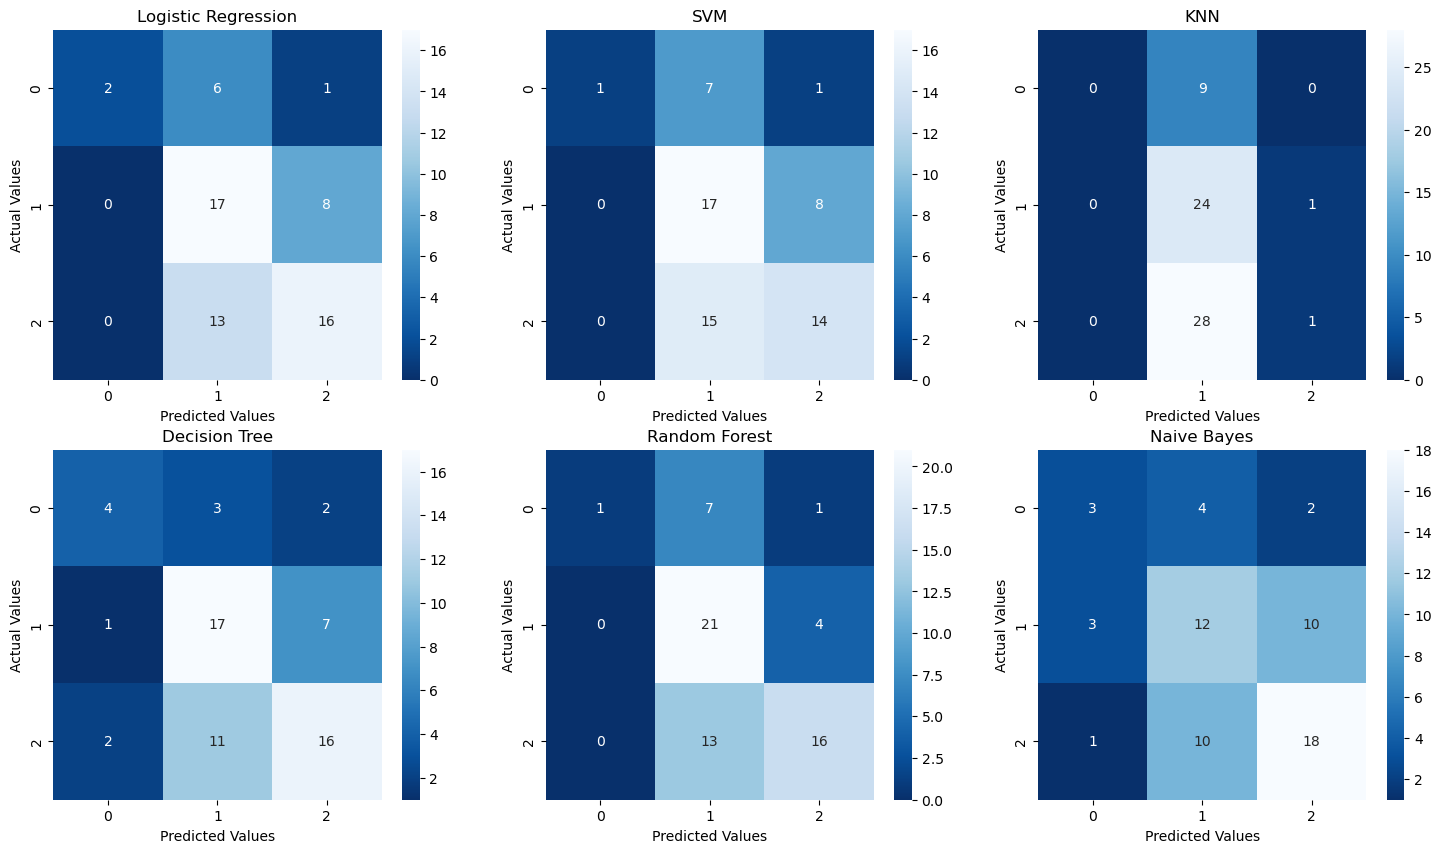

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Dataset_cm_list)):
    cm = Dataset_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [13]:
data_labels_results = pd.DataFrame({'Model':model_list, 'Accuracy':Dataset_acc_list}) #, 'AUC':Dataset_auc_list
data_labels_results 

,Model,Accuracy
0,Logistic Regression,0.555556
1,SVM,0.507937
2,KNN,0.396825
3,Decision Tree,0.587302
4,Random Forest,0.603175
5,Naive Bayes,0.523810


#### Training ML Models on VADER Predictions

##### Setting up VADER Predictions

In [14]:
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>0):
        sentiment=1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)
filtered_df.sample(5)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84745/1238489961.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)


,text,polarity,subjectivity,label,tokens,vader_prediction
171,science The 11TH HOUR FOR THE EARTH climate ch...,0.00000,0.000,0,"[science, The, 11TH, HOUR, FOR, THE, EARTH, cl...",1
328,Fed has a role in combating climate change ris...,0.00000,0.000,0,"[Fed, has, a, role, in, combating, climate, ch...",1
93,Fires do not occur naturally in the Amazon rai...,0.24375,0.475,1,"[Fires, do, not, occur, naturally, in, the, Am...",1
244,What Was Really Happening In AustraliaOver 200...,0.10000,0.100,1,"[What, Was, Really, Happening, In, AustraliaOv...",1
153,Global warming and climate change made number ...,0.00000,0.000,0,"[Global, warming, and, climate, change, made, ...",1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.vader_prediction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [17]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Vader_acc_list = []
Vader_auc_list = []
Vader_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

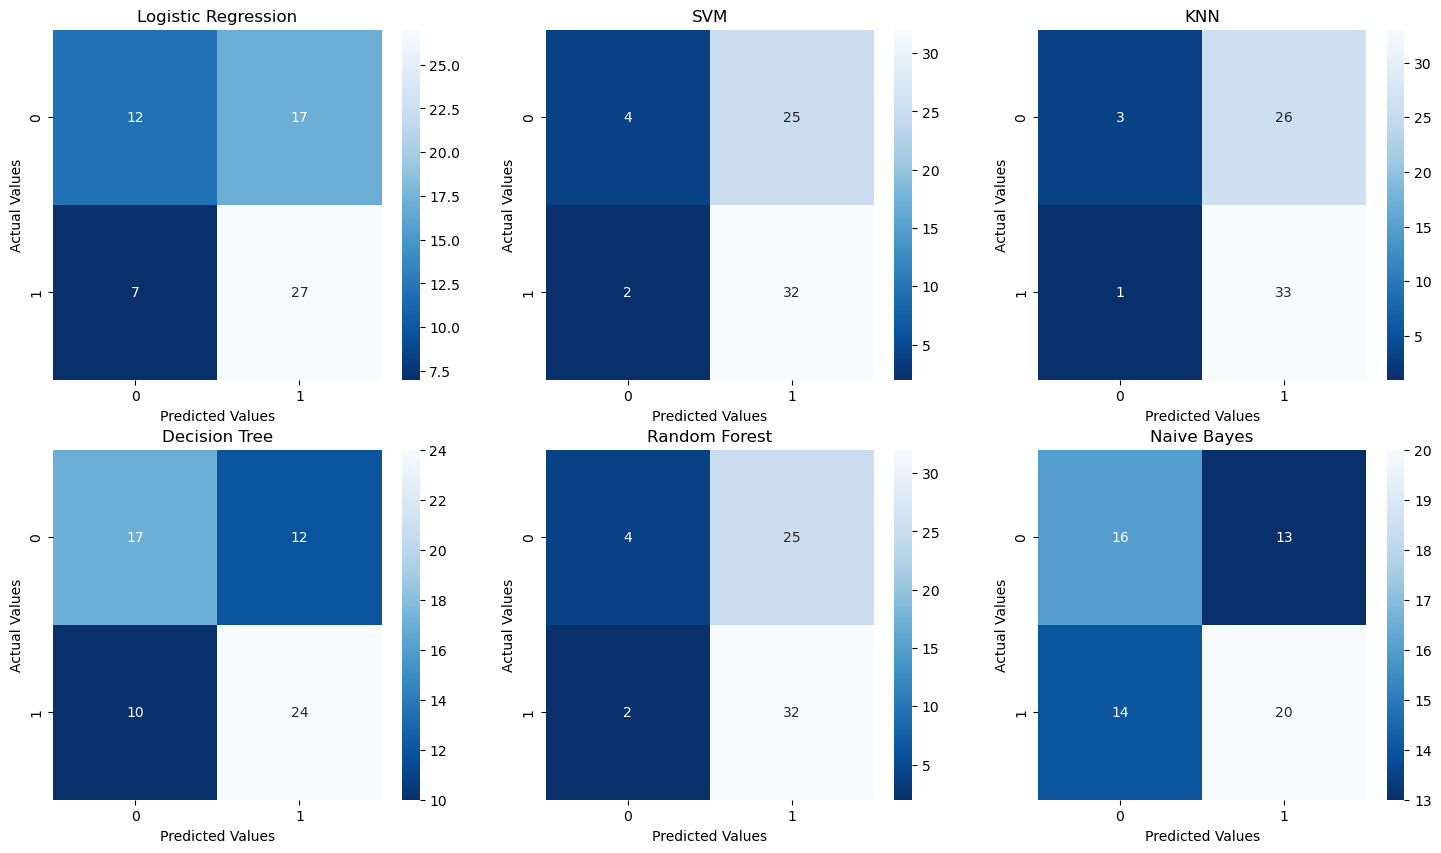

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Vader_cm_list)):
    cm = Vader_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [20]:
VaderML_results = pd.DataFrame({'Model':model_list, 'Accuracy':Vader_acc_list}) #, 'AUC':Dataset_auc_list
VaderML_results

,Model,Accuracy
0,Logistic Regression,0.619048
1,SVM,0.571429
2,KNN,0.571429
3,Decision Tree,0.650794
4,Random Forest,0.571429
5,Naive Bayes,0.571429


#### Textblob & 6 Machine Learning Models

##### Setting up TextBlob Predictions

In [21]:
from textblob import TextBlob

In [22]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] =    text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score <= 0:
    return 0
  else:
    return 1
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

In [23]:
filtered_df = sentiment_analysis(filtered_df)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84745/2430189755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['TextBlob_Subjectivity'] =    text['text'].apply(getSubjectivity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84745/2430189755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84745/2430189755.py:17: SettingWithCopyWarning: 
A value is try

In [24]:
filtered_df.head()

,text,polarity,subjectivity,label,tokens,vader_prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1,"[The, death, of, summer, Arctic, ice, our, Ear...",0,0.426984,-0.054365,0
2,From better climate change education to improv...,0.261905,0.345238,1,"[From, better, climate, change, education, to,...",1,0.345238,0.261905,1
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0,"[climate, change, Links, to, FIXING, CLIMATE, ...",1,0.000000,0.000000,0
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0,"[climate, change, The, 11TH, HOUR, FOR, THE, E...",1,0.000000,0.000000,0
5,For years now scientists and governments have ...,-0.121875,0.325000,-1,"[For, years, now, scientists, and, governments...",1,0.325000,-0.121875,0


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.TextBlob_Analysis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [27]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
tb_acc_list = []
tb_auc_list = []
tb_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

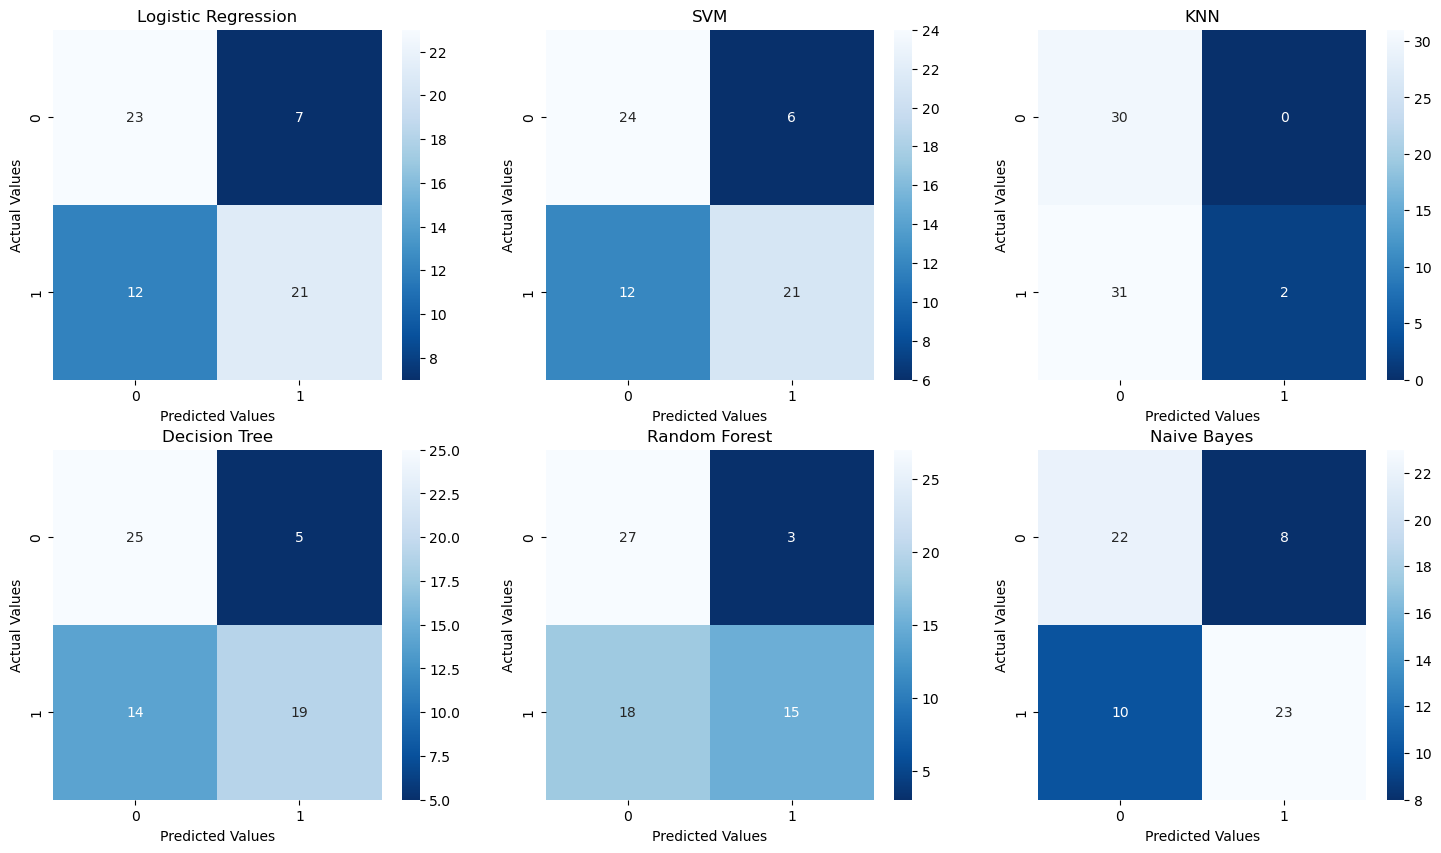

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(tb_cm_list)):
    cm = tb_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [30]:
TBML_results = pd.DataFrame({'Model':model_list, 'Accuracy':tb_acc_list}) #, 'AUC':tb_auc_list
TBML_results

,Model,Accuracy
0,Logistic Regression,0.698413
1,SVM,0.714286
2,KNN,0.507937
3,Decision Tree,0.698413
4,Random Forest,0.666667
5,Naive Bayes,0.714286


#### Flair & 6 Machine Learning Models

In [31]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

sia = TextClassifier.load('en-sentiment')

In [32]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    else:
        return 0

In [33]:
filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84745/370663139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.Flair_Sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [36]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
f_acc_list = []
f_auc_list = []
f_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
   #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
   #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

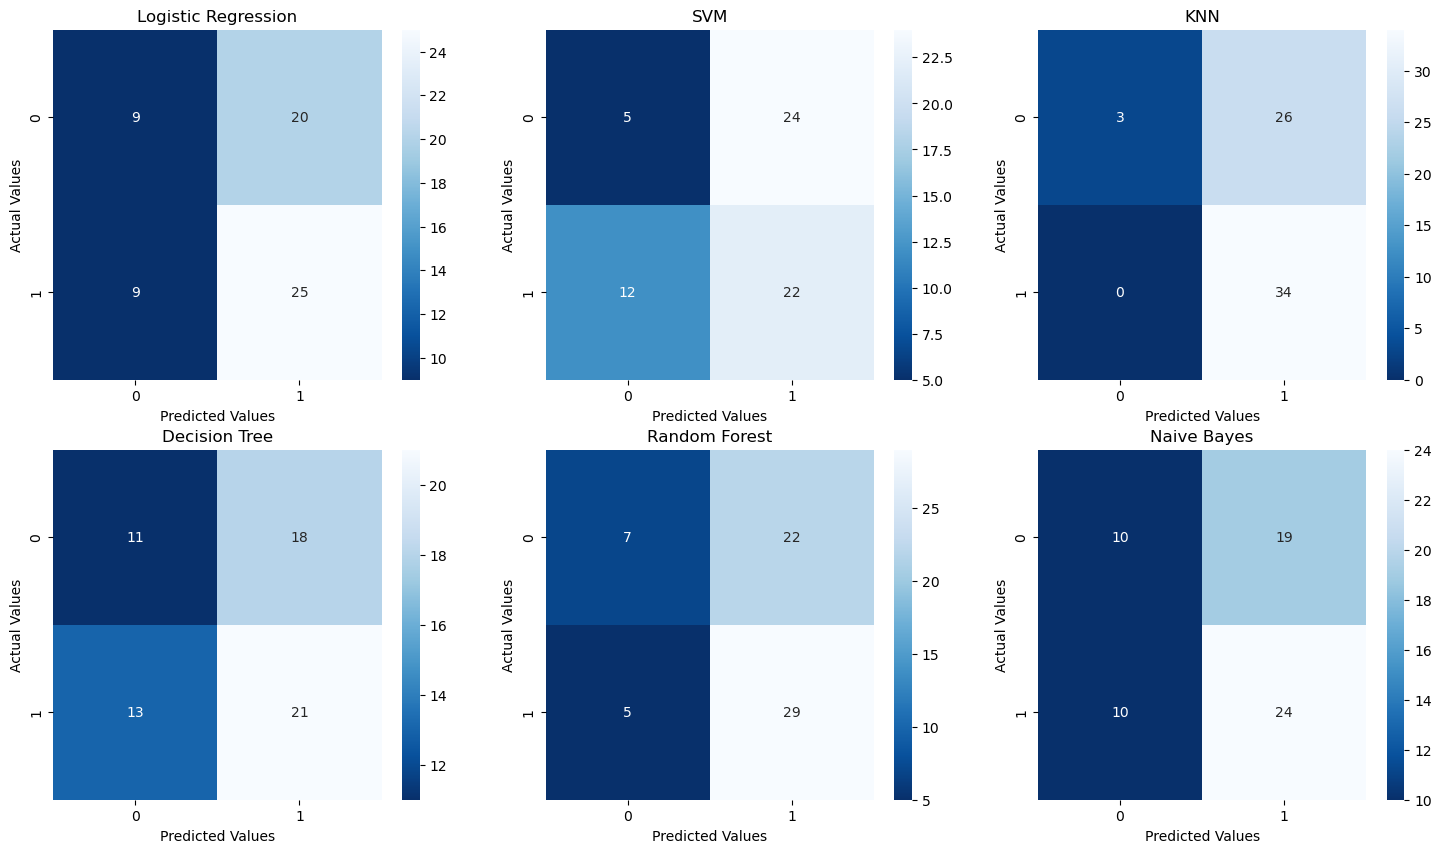

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(f_cm_list)):
    cm = f_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [39]:
FlairML_results = pd.DataFrame({'Model':model_list, 'Accuracy':f_acc_list}) #, 'AUC':f_auc_list
FlairML_results

,Model,Accuracy
0,Logistic Regression,0.539683
1,SVM,0.428571
2,KNN,0.587302
3,Decision Tree,0.507937
4,Random Forest,0.571429
5,Naive Bayes,0.539683


#### Final Results Dataframe

In [40]:
all_results = pd.DataFrame({'Model':model_list, 'Dataset Labels Accuracy': Dataset_acc_list, 'VADER Accuracy': Vader_acc_list, 'TextBlob Accuracy': tb_acc_list, 'Flair Accuracy': f_acc_list})
all_results

,Model,Dataset Labels Accuracy,VADER Accuracy,TextBlob Accuracy,Flair Accuracy
0,Logistic Regression,0.555556,0.619048,0.698413,0.539683
1,SVM,0.507937,0.571429,0.714286,0.428571
2,KNN,0.396825,0.571429,0.507937,0.587302
3,Decision Tree,0.587302,0.650794,0.698413,0.507937
4,Random Forest,0.603175,0.571429,0.666667,0.571429
5,Naive Bayes,0.523810,0.571429,0.714286,0.539683
